In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv('datasets_723632_1258000_weather.csv')
data

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold
...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal


In [5]:
data.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [6]:
##INSPECTION CODE TO UNDERSTTAND THE DATA
data.shape

(10000, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [8]:
data.describe()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.857208,0.735272,10.813565,185.979700,10.372964,1004.896421,0.891200
std,9.512244,0.195498,6.972569,107.469909,4.178680,109.617120,0.311404
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.655556,0.600000,5.747700,112.000000,8.287475,1011.890000,1.000000
50%,11.561111,0.780000,9.933700,179.000000,10.046400,1016.500000,1.000000
75%,18.822222,0.900000,14.103600,290.000000,14.876400,1021.110000,1.000000
max,38.838889,1.000000,53.242700,359.000000,16.100000,1045.380000,1.000000


In [9]:
import seaborn as sns

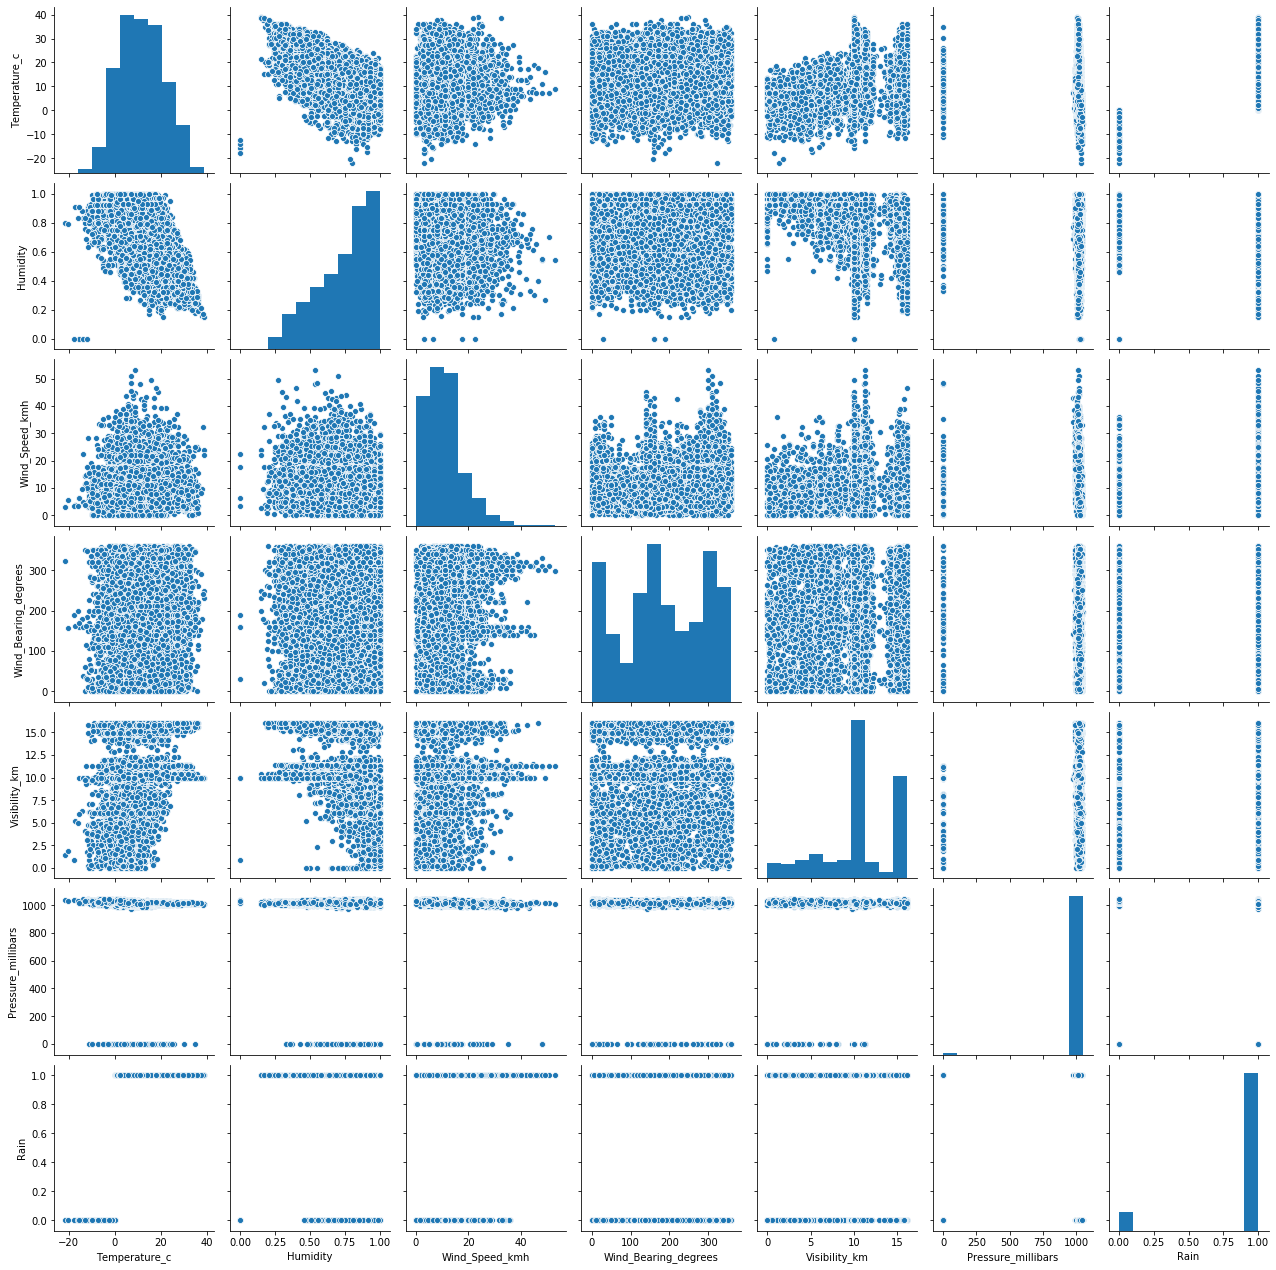

In [10]:
##PAIRPLOT BETWWEN NUMERICAL COLUMNS
sns.pairplot(data)
plt.show()

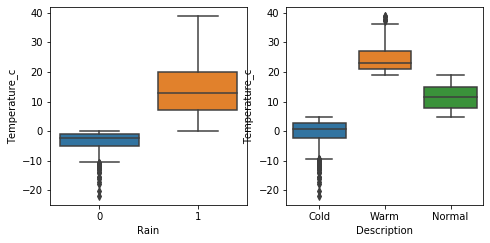

In [11]:
x=data['Rain']
t=data['Description']
y=data['Temperature_c']
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
sns.boxplot(x,y)

plt.subplot(2,3,2)
sns.boxplot(t,y)

In [12]:
##DATA PREPARENTION


In [13]:
##GET THE DUMMY_VARIABLE FOR DESCRIPTION AND STORE IT TO THE NEW VARIABLE
weather_status=pd.get_dummies(t)


In [14]:
##CHECK HOW THE DATASET LOOKS
weather_status.head()

,Cold,Normal,Warm
0,1,0,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0


In [15]:
#lets drop the first column from status dataframe using 'drop_first = True'
weather_status = pd.get_dummies(data['Description'],drop_first = True)

In [16]:
# Add the result to the original data frame weather1
data = pd.concat([data,weather_status],axis=1)

In [17]:
#Drop 'Description' as we have created the dummies for it
data.drop(['Description'],axis=1, inplace= True )

In [18]:
data.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Normal,Warm
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,0,0
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,0,1
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,1,0
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,0,0
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,0,0


In [19]:
##TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

In [20]:
##split the dataset into 70:30

np.random.seed(30)
df_train,df_test=train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)
              

In [21]:
df_train

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Normal,Warm
1191,6.088889,0.86,22.3468,150,9.9820,1009.73,1,1,0
4458,-0.377778,0.94,9.7727,191,9.7888,1020.39,0,0,0
1131,0.227778,0.99,2.9141,336,1.8676,1027.40,1,0,0
9562,-3.694444,0.92,15.2306,129,4.7334,1021.29,0,0,0
6579,24.844444,0.76,16.7923,171,16.1000,1006.69,1,0,1
...,...,...,...,...,...,...,...,...,...
350,-0.555556,0.66,25.7600,300,16.1000,1016.40,0,0,0
79,-2.877778,0.48,20.8495,23,10.3523,1022.32,0,0,0
8039,10.094444,0.82,10.9158,49,9.9337,1019.82,1,1,0
6936,5.555556,0.93,14.4900,290,8.0500,1008.40,1,1,0


In [22]:
df_train.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Normal,Warm
1191,6.088889,0.86,22.3468,150,9.9820,1009.73,1,1,0
4458,-0.377778,0.94,9.7727,191,9.7888,1020.39,0,0,0
1131,0.227778,0.99,2.9141,336,1.8676,1027.40,1,0,0
9562,-3.694444,0.92,15.2306,129,4.7334,1021.29,0,0,0
6579,24.844444,0.76,16.7923,171,16.1000,1006.69,1,0,1


In [23]:
df_test.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Normal,Warm
8018,15.000000,0.36,28.9800,280,9.9820,1012.90,1,1,0
9225,5.000000,0.93,14.4900,70,3.0590,1015.30,1,1,0
3854,16.288889,0.47,17.5490,21,9.9820,1023.76,1,1,0
2029,7.066667,0.82,13.4113,331,11.0768,1010.51,1,1,0
3539,0.555556,0.78,11.2700,340,16.1000,1019.10,1,0,0


In [24]:
##NORMALIZATION:(x-xmin)/(xmax-xmim)

from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
num_vars1=['Temperature_c','Humidity','Wind_Speed_kmh','Wind_Bearing_degrees','Visibility_km','Pressure_millibars']
df_train[num_vars1]=scaler.fit_transform(df_train[num_vars1])


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [27]:
df_train.describe()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Normal,Warm
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.544812,0.735791,0.201915,0.518823,0.643378,0.961248,0.896000,0.501143,0.251143
std,0.160066,0.194590,0.131093,0.298026,0.257460,0.104921,0.305282,0.500034,0.433702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.424302,0.600000,0.104853,0.323120,0.519000,0.967952,1.000000,0.000000,0.000000
50%,0.538906,0.780000,0.182340,0.501393,0.624000,0.972359,1.000000,1.000000,0.000000
75%,0.661521,0.900000,0.263985,0.807799,0.920000,0.976812,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


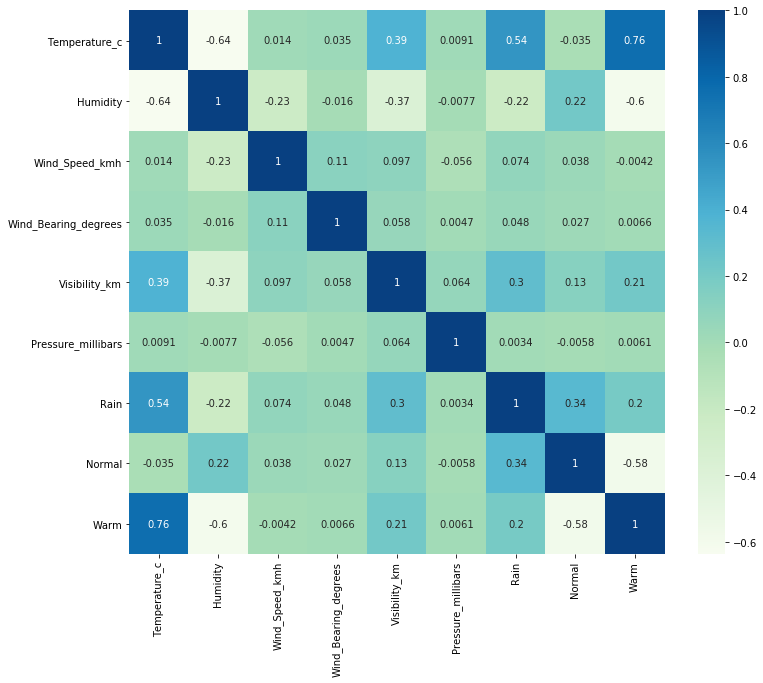

In [29]:
##CHECK CORELATION BETWWEN DF_TARIN(DUMMY VARIABLE)

plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(),annot=True,cmap='GnBu')
plt.show()

In [34]:
##MODEL BUILDING
#Dividing into X and y set for model building

y_train = df_train.pop('Temperature_c')
X_train = df_train

In [35]:
########                                       MODEL:1
# Building the Model

import statsmodels.api as sm

#Add a constant

X_train_lm = sm.add_constant(X_train[['Humidity']])
# Create a first fitted model
lr  = sm.OLS(y_train, X_train_lm).fit()

In [36]:
lr.params

const       0.930161
Humidity   -0.523719
dtype: float64

In [37]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Temperature_c   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     4770.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:44:09   Log-Likelihood:                 4712.4
No. Observations:                7000   AIC:                            -9421.
Df Residuals:                    6998   BIC:                            -9407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9302      0.006    161.178      0.000       0.919       0.941
Humidity      -0.5237      0.008    -69.068      0.000      -0.539      -0.509
==============================================================================
Omnibus:                      136.975   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.564
Skew:                          -0.350   Prob(JB):                     4.06e-32
Kurtosis:                       2.918   Cond. No.                         7.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Assign all the feature variables to X
X_train_lm = X_train[['Humidity','Wind_Speed_kmh'] ]


In [40]:
######### MODEL2
#Build a linear Model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr  = sm.OLS(y_train, X_train_lm).fit()
lr.params


const             0.983932
Humidity         -0.550068
Wind_Speed_kmh   -0.170294
dtype: float64

In [41]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Temperature_c   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     2573.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:49:07   Log-Likelihood:                 4822.6
No. Observations:                7000   AIC:                            -9639.
Df Residuals:                    6997   BIC:                            -9619.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9839      0.007    146.351      0.000       0.971       0.997
Humidity          -0.5501      0.008    -71.719      0.000      -0.565      -0.535
Wind_Speed_kmh    -0.1703      0.011    -14.958      0.000      -0.193      -0.148
==============================================================================
Omnibus:                      181.369   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.297
Skew:                          -0.409   Prob(JB):                     3.91e-43
Kurtosis:                       3.038   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
X_train_lm = X_train[['Humidity','Wind_Speed_kmh','Wind_Bearing_degrees'] ]

In [43]:
  ############# MODEL:3

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr  = sm.OLS(y_train, X_train_lm).fit()
lr.params
    

const                   0.974196
Humidity               -0.550398
Wind_Speed_kmh         -0.175859
Wind_Bearing_degrees    0.021399
dtype: float64

In [44]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Temperature_c   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     1726.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:50:31   Log-Likelihood:                 4832.1
No. Observations:                7000   AIC:                            -9656.
Df Residuals:                    6996   BIC:                            -9629.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9742      0.007    137.702      0.000       0.960       0.988
Humidity                -0.5504      0.008    -71.851      0.000      -0.565      -0.535
Wind_Speed_kmh          -0.1759      0.011    -15.371      0.000      -0.198      -0.153
Wind_Bearing_degrees     0.0214      0.005      4.368      0.000       0.012       0.031
==============================================================================
Omnibus:                      179.386   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.046
Skew:                          -0.407   Prob(JB):                     1.20e-42
Kurtosis:                       3.026   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
X_train_lm = X_train[['Humidity','Wind_Speed_kmh','Wind_Bearing_degrees','Visibility_km'] ]

In [46]:
 ############# MODEL:4

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr  = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                   0.868658
Humidity               -0.497678
Wind_Speed_kmh         -0.177240
Wind_Bearing_degrees    0.016637
Visibility_km           0.108019
dtype: float64

In [47]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Temperature_c   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     1438.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:52:45   Log-Likelihood:                 4993.8
No. Observations:                7000   AIC:                            -9978.
Df Residuals:                    6995   BIC:                            -9943.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8687      0.009     96.237      0.000       0.851       0.886
Humidity                -0.4977      0.008    -61.997      0.000      -0.513      -0.482
Wind_Speed_kmh          -0.1772      0.011    -15.852      0.000      -0.199      -0.155
Wind_Bearing_degrees     0.0166      0.005      3.470      0.001       0.007       0.026
Visibility_km            0.1080      0.006     18.187      0.000       0.096       0.120
==============================================================================
Omnibus:                      194.437   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.304
Skew:                          -0.422   Prob(JB):                     2.15e-46
Kurtosis:                       3.093   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
X_train_lm = X_train[['Humidity','Wind_Speed_kmh','Wind_Bearing_degrees','Visibility_km','Pressure_millibars'] ]

In [49]:
############# MODEL:5

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr  = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                   0.890735
Humidity               -0.497620
Wind_Speed_kmh         -0.178412
Wind_Bearing_degrees    0.016700
Visibility_km           0.108699
Pressure_millibars     -0.023254
dtype: float64

In [50]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Temperature_c   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     1152.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:54:04   Log-Likelihood:                 4995.3
No. Observations:                7000   AIC:                            -9979.
Df Residuals:                    6994   BIC:                            -9937.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8907      0.016     56.641      0.000       0.860       0.922
Humidity                -0.4976      0.008    -61.997      0.000      -0.513      -0.482
Wind_Speed_kmh          -0.1784      0.011    -15.929      0.000      -0.200      -0.156
Wind_Bearing_degrees     0.0167      0.005      3.484      0.000       0.007       0.026
Visibility_km            0.1087      0.006     18.263      0.000       0.097       0.120
Pressure_millibars      -0.0233      0.014     -1.714      0.087      -0.050       0.003
==============================================================================
Omnibus:                      193.748   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.494
Skew:                          -0.421   Prob(JB):                     3.23e-46
Kurtosis:                       3.095   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X_train_lm = X_train[['Humidity','Wind_Speed_kmh','Wind_Bearing_degrees','Visibility_km','Pressure_millibars','Rain'] ]

In [52]:
############# MODEL:6

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr  = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                   0.704750
Humidity               -0.454407
Wind_Speed_kmh         -0.186805
Wind_Bearing_degrees    0.010178
Visibility_km           0.045887
Pressure_millibars     -0.015347
Rain                    0.214374
dtype: float64

In [53]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Temperature_c   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1757.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:55:27   Log-Likelihood:                 6110.2
No. Observations:                7000   AIC:                        -1.221e+04
Df Residuals:                    6993   BIC:                        -1.216e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7047      0.014     50.722      0.000       0.678       0.732
Humidity                -0.4544      0.007    -65.885      0.000      -0.468      -0.441
Wind_Speed_kmh          -0.1868      0.010    -19.554      0.000      -0.206      -0.168
Wind_Bearing_degrees     0.0102      0.004      2.488      0.013       0.002       0.018
Visibility_km            0.0459      0.005      8.788      0.000       0.036       0.056
Pressure_millibars      -0.0153      0.012     -1.326      0.185      -0.038       0.007
Rain                     0.2144      0.004     51.219      0.000       0.206       0.223
==============================================================================
Omnibus:                      103.028   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.754
Skew:                          -0.230   Prob(JB):                     1.19e-20
Kurtosis:                       2.678   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X_train_lm = X_train[['Humidity','Wind_Speed_kmh','Wind_Bearing_degrees','Visibility_km','Pressure_millibars','Rain','Normal'] ]

In [55]:
############# MODEL:7

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr  = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                   0.680855
Humidity               -0.430540
Wind_Speed_kmh         -0.179068
Wind_Bearing_degrees    0.010085
Visibility_km           0.053119
Pressure_millibars     -0.016441
Rain                    0.229592
Normal                 -0.024777
dtype: float64

In [56]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Temperature_c   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     1535.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:56:28   Log-Likelihood:                 6150.9
No. Observations:                7000   AIC:                        -1.229e+04
Df Residuals:                    6992   BIC:                        -1.223e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6809      0.014     48.405      0.000       0.653       0.708
Humidity                -0.4305      0.007    -58.587      0.000      -0.445      -0.416
Wind_Speed_kmh          -0.1791      0.010    -18.776      0.000      -0.198      -0.160
Wind_Bearing_degrees     0.0101      0.004      2.480      0.013       0.002       0.018
Visibility_km            0.0531      0.005     10.111      0.000       0.043       0.063
Pressure_millibars      -0.0164      0.012     -1.429      0.153      -0.039       0.006
Rain                     0.2296      0.004     51.140      0.000       0.221       0.238
Normal                  -0.0248      0.003     -9.035      0.000      -0.030      -0.019
==============================================================================
Omnibus:                      165.424   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.450
Skew:                          -0.356   Prob(JB):                     4.35e-37
Kurtosis:                       2.740   Cond. No.                         30.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X_train_lm = X_train[['Humidity','Wind_Speed_kmh','Wind_Bearing_degrees','Visibility_km','Pressure_millibars','Rain','Normal','Warm'] ]

In [58]:
############# MODEL:8

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr  = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                   0.414375
Humidity               -0.141900
Wind_Speed_kmh         -0.068487
Wind_Bearing_degrees    0.005312
Visibility_km           0.018632
Pressure_millibars     -0.001184
Rain                    0.091703
Normal                  0.143410
Warm                    0.322662
dtype: float64

In [60]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Temperature_c   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     5540.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:57:31   Log-Likelihood:                 9869.7
No. Observations:                7000   AIC:                        -1.972e+04
Df Residuals:                    6991   BIC:                        -1.966e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4144      0.009     48.253      0.000       0.398       0.431
Humidity                -0.1419      0.005    -28.404      0.000      -0.152      -0.132
Wind_Speed_kmh          -0.0685      0.006    -12.039      0.000      -0.080      -0.057
Wind_Bearing_degrees     0.0053      0.002      2.221      0.026       0.001       0.010
Visibility_km            0.0186      0.003      6.005      0.000       0.013       0.025
Pressure_millibars      -0.0012      0.007     -0.175      0.861      -0.014       0.012
Rain                     0.0917      0.003     31.636      0.000       0.086       0.097
Normal                   0.1434      0.002     65.898      0.000       0.139       0.148
Warm                     0.3227      0.003    115.060      0.000       0.317       0.328
==============================================================================
Omnibus:                       22.258   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.518
Skew:                           0.057   Prob(JB):                     9.52e-05
Kurtosis:                       2.775   Cond. No.                         31.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#Check for the VIF values of the feature variable
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [62]:
#Create a data frame that will contains all the names of the all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False )
vif

,Features,VIF
4,Pressure_millibars,36.98
0,Humidity,19.51
5,Rain,14.70
3,Visibility_km,8.82
6,Normal,4.74
2,Wind_Bearing_degrees,4.07
7,Warm,3.67
1,Wind_Speed_kmh,3.45


In [63]:
# We generally want a VIF with less than 5 hence we need to drop some variables and consider p also should not be higher than 0.5

#Dropping the variable Pressure_millibars as p is 0.861 as well as VIF very large as compared to 5

X = X_train.drop('Pressure_millibars',1,)

In [64]:
############# MODEL:9
#Build a fitted model again
X_train_lm = sm.add_constant(X)
lr_2  = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                   0.414375
Humidity               -0.141900
Wind_Speed_kmh         -0.068487
Wind_Bearing_degrees    0.005312
Visibility_km           0.018632
Pressure_millibars     -0.001184
Rain                    0.091703
Normal                  0.143410
Warm                    0.322662
dtype: float64

In [65]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Temperature_c   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     5540.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:01:33   Log-Likelihood:                 9869.7
No. Observations:                7000   AIC:                        -1.972e+04
Df Residuals:                    6991   BIC:                        -1.966e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4144      0.009     48.253      0.000       0.398       0.431
Humidity                -0.1419      0.005    -28.404      0.000      -0.152      -0.132
Wind_Speed_kmh          -0.0685      0.006    -12.039      0.000      -0.080      -0.057
Wind_Bearing_degrees     0.0053      0.002      2.221      0.026       0.001       0.010
Visibility_km            0.0186      0.003      6.005      0.000       0.013       0.025
Pressure_millibars      -0.0012      0.007     -0.175      0.861      -0.014       0.012
Rain                     0.0917      0.003     31.636      0.000       0.086       0.097
Normal                   0.1434      0.002     65.898      0.000       0.139       0.148
Warm                     0.3227      0.003    115.060      0.000       0.317       0.328
==============================================================================
Omnibus:                       22.258   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.518
Skew:                           0.057   Prob(JB):                     9.52e-05
Kurtosis:                       2.775   Cond. No.                         31.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False )
vif


,Features,VIF
4,Rain,14.19
3,Visibility_km,7.64
0,Humidity,7.32
5,Normal,4.74
2,Wind_Bearing_degrees,4.01
6,Warm,3.36
1,Wind_Speed_kmh,3.25


In [67]:
#High VIF is rain variable with 14.19 large value
X=X.drop('Rain',1)

In [68]:
####### MODEL10
X_train_lm = sm.add_constant(X)
lr2  = sm.OLS(y_train, X_train_lm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Temperature_c   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     6318.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:02:50   Log-Likelihood:                 9401.4
No. Observations:                7000   AIC:                        -1.879e+04
Df Residuals:                    6993   BIC:                        -1.874e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4565      0.006     78.038      0.000       0.445       0.468
Humidity                -0.1390      0.005    -26.038      0.000      -0.150      -0.129
Wind_Speed_kmh          -0.0587      0.006     -9.692      0.000      -0.071      -0.047
Wind_Bearing_degrees     0.0068      0.003      2.668      0.008       0.002       0.012
Visibility_km            0.0287      0.003      8.730      0.000       0.022       0.035
Normal                   0.1800      0.002     91.298      0.000       0.176       0.184
Warm                     0.3593      0.003    131.674      0.000       0.354       0.365
==============================================================================
Omnibus:                       21.818   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.674
Skew:                          -0.125   Prob(JB):                     1.97e-05
Kurtosis:                       2.892   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:

#Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False )
vif

,Features,VIF
3,Visibility_km,7.23
0,Humidity,5.73
2,Wind_Bearing_degrees,4.00
4,Normal,3.26
1,Wind_Speed_kmh,3.17
5,Warm,2.28


In [70]:
#High VIF value hence dropping Visibility_km 7.23

X=X.drop('Visibility_km',1)

In [71]:
###### FINAL MODEL:
X_train_lm = sm.add_constant(X)
lr3  = sm.OLS(y_train, X_train_lm).fit()

In [72]:
#Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False )
vif

,Features,VIF
0,Humidity,4.85
2,Wind_Bearing_degrees,3.93
1,Wind_Speed_kmh,3.01
3,Normal,2.66
4,Warm,1.60


In [73]:
#######Residual Analysis
y_train_temp = lr3.predict(X_train_lm)


Text(0.5, 0, 'Errors')

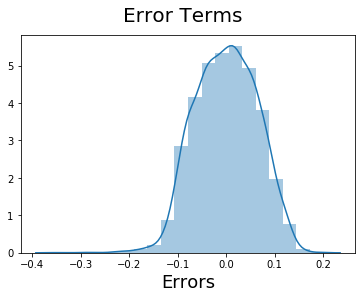

In [74]:
#Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_temp), bins = 20)
fig.suptitle('Error Terms' , fontsize = 20)
plt.xlabel('Errors',fontsize = 18)      

In [ ]:
## CONCLUSION
Temperaturec=0.4797−(0.1508∗Humidity)−(0.0582∗WindSpeedkmh)+(0.0078∗WindBearingdegrees)+(0.1847∗Normal)+(0.3630∗Warm)